In [1]:
import numpy as np
import pandas as pd
from pandas import Series

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

random_state = 42

In [2]:
df_train = pd.read_csv('train_scoring.csv')
#df_test = pd.read_csv('test.csv')
#sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
client_id           73799 non-null int64
education           73492 non-null object
sex                 73799 non-null object
age                 73799 non-null int64
car                 73799 non-null object
car_type            73799 non-null object
decline_app_cnt     73799 non-null int64
good_work           73799 non-null int64
bki_request_cnt     73799 non-null int64
home_address        73799 non-null int64
work_address        73799 non-null int64
income              73799 non-null int64
foreign_passport    73799 non-null object
default             73799 non-null int64
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [4]:
df_train['default'].value_counts()

0    64427
1     9372
Name: default, dtype: int64

In [5]:
df_train['education'].fillna('SCH', inplace=True)

SCH    39167
GRD    23365
UGR     9816
PGR     1257
ACD      194
Name: education, dtype: int64

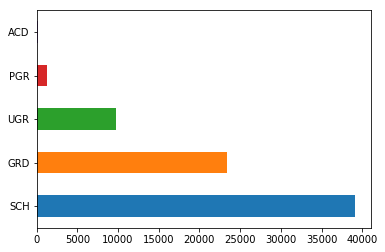

In [6]:
df_train['education'].value_counts().plot.barh()
df_train['education'].value_counts()

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
client_id           73799 non-null int64
education           73799 non-null object
sex                 73799 non-null object
age                 73799 non-null int64
car                 73799 non-null object
car_type            73799 non-null object
decline_app_cnt     73799 non-null int64
good_work           73799 non-null int64
bki_request_cnt     73799 non-null int64
home_address        73799 non-null int64
work_address        73799 non-null int64
income              73799 non-null int64
foreign_passport    73799 non-null object
default             73799 non-null int64
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [8]:
df_train.head()

client_id education sex  age car car_type  decline_app_cnt  good_work  \
0      25905       SCH   M   62   Y        Y                0          0   
1      63161       SCH   F   59   N        N                0          0   
2      25887       SCH   M   25   Y        N                2          0   
3      16222       SCH   F   53   N        N                0          0   
4     101655       GRD   M   48   N        N                0          1   

   bki_request_cnt  home_address  work_address  income foreign_passport  \
0                1             1             2   18000                N   
1                3             2             3   19000                N   
2                1             1             2   30000                Y   
3                2             2             3   10000                N   
4                1             2             3   30000                Y   

   default  
0        0  
1        0  
2        0  
3        0  
4        0

In [9]:
bin_cols = ['sex', 'car', 'car_type', 'foreign_passport', 'good_work']
cat_cols = ['education', 'home_address', 'work_address']
num_cols = ['age', 'decline_app_cnt', 'income', 'bki_request_cnt']

In [10]:
df_train.sample(5)

client_id education sex  age car car_type  decline_app_cnt  good_work  \
25049      41394       SCH   F   50   N        N                0          0   
12472      28463       GRD   F   41   N        N                0          0   
61025      40769       SCH   M   54   N        N                0          0   
30364      34704       GRD   M   29   Y        Y                0          0   
51031      12019       SCH   F   62   N        N                1          0   

       bki_request_cnt  home_address  work_address  income foreign_passport  \
25049                0             1             1   26000                Y   
12472                1             1             2   50000                N   
61025                1             2             3   50000                N   
30364                6             1             1   50000                N   
51031                1             2             3    9000                N   

       default  
25049        0  
12472        0  
61025        1  
30364        0  
51031        0

In [11]:
df_train.car_type.value_counts()

N    59791
Y    14008
Name: car_type, dtype: int64

In [12]:
df_train.isna().sum()

client_id           0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
bki_request_cnt     0
home_address        0
work_address        0
income              0
foreign_passport    0
default             0
dtype: int64

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


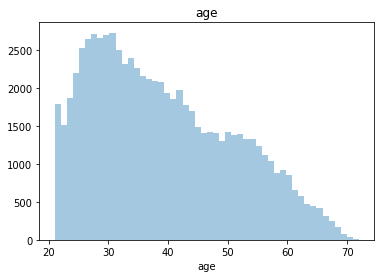

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


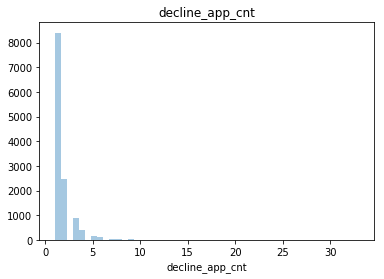

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


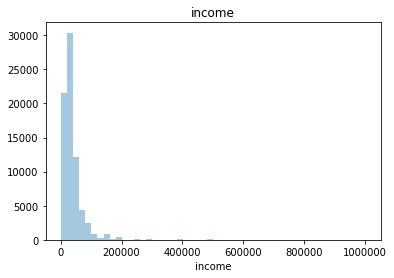

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


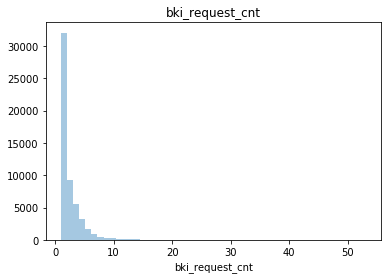

In [13]:
for i in num_cols:
    plt.figure()
    sns.distplot(df_train[i][df_train[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


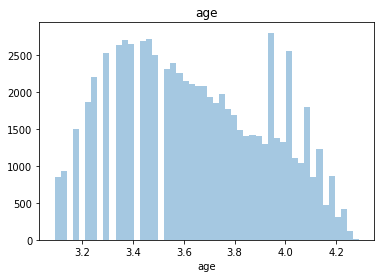

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


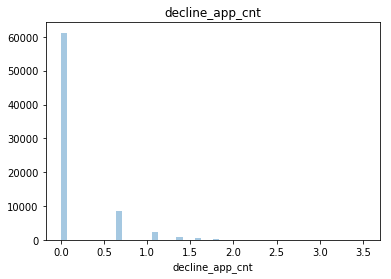

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


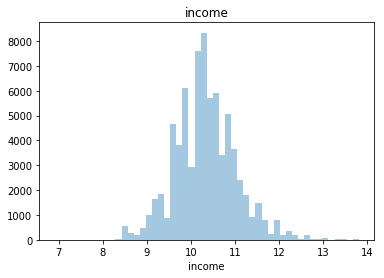

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


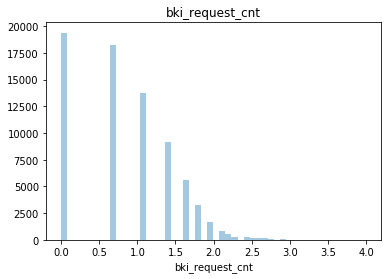

In [14]:
for i in num_cols:
    plt.figure()
    sns.distplot(np.log(df_train[i] + 1), kde=False, rug=False)
    plt.title(i)
    plt.show()

In [15]:
for i in num_cols:
    df_train[i] = np.log(df_train[i] + 1)

In [16]:
df_train.head()

client_id education sex       age car car_type  decline_app_cnt  good_work  \
0      25905       SCH   M  4.143135   Y        Y         0.000000          0   
1      63161       SCH   F  4.094345   N        N         0.000000          0   
2      25887       SCH   M  3.258097   Y        N         1.098612          0   
3      16222       SCH   F  3.988984   N        N         0.000000          0   
4     101655       GRD   M  3.891820   N        N         0.000000          1   

   bki_request_cnt  home_address  work_address     income foreign_passport  \
0         0.693147             1             2   9.798183                N   
1         1.386294             2             3   9.852247                N   
2         0.693147             1             2  10.308986                Y   
3         1.098612             2             3   9.210440                N   
4         0.693147             2             3  10.308986                Y   

   default  
0        0  
1        0  
2        0  
3        0  
4        0

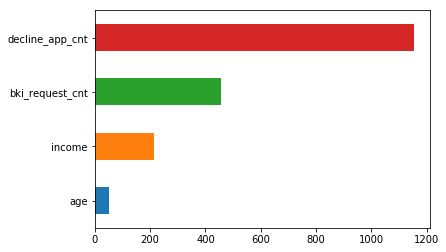

In [17]:
imp_num = Series(f_classif(df_train[num_cols], df_train['default'])[0], index=num_cols)
imp_num.sort_values(inplace=True)
imp_num.plot(kind='barh')

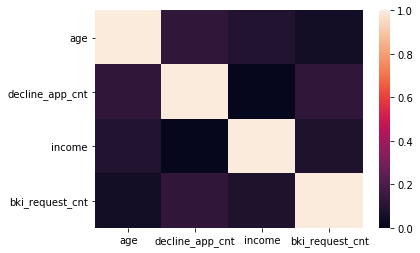

In [18]:
sns.heatmap(df_train[num_cols].corr().abs(), vmin=0, vmax=1)

In [19]:
df_train['sex'].head()

0    M
1    F
2    M
3    F
4    M
Name: sex, dtype: object

In [20]:
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(df_train['sex']))
print(dict(enumerate(label_encoder.classes_)))

{0: 'F', 1: 'M'}


In [21]:
label_encoder = LabelEncoder()

for column in bin_cols:
    df_train[column] = label_encoder.fit_transform(df_train[column])
    
# убедимся в преобразовании    
df_train.head()

client_id education  sex       age  car  car_type  decline_app_cnt  \
0      25905       SCH    1  4.143135    1         1         0.000000   
1      63161       SCH    0  4.094345    0         0         0.000000   
2      25887       SCH    1  3.258097    1         0         1.098612   
3      16222       SCH    0  3.988984    0         0         0.000000   
4     101655       GRD    1  3.891820    0         0         0.000000   

   good_work  bki_request_cnt  home_address  work_address     income  \
0          0         0.693147             1             2   9.798183   
1          0         1.386294             2             3   9.852247   
2          0         0.693147             1             2  10.308986   
3          0         1.098612             2             3   9.210440   
4          1         0.693147             2             3  10.308986   

   foreign_passport  default  
0                 0        0  
1                 0        0  
2                 1        0  
3                 0        0  
4                 1        0

In [22]:
label_encoder_ed = LabelEncoder()

df_train['education'] = pd.Series(label_encoder_ed.fit_transform(df_train['education']))
print(dict(enumerate(label_encoder_ed.classes_)))

{0: 'ACD', 1: 'GRD', 2: 'PGR', 3: 'SCH', 4: 'UGR'}


In [23]:
df_train.education.head()

0    3
1    3
2    3
3    3
4    1
Name: education, dtype: int64

mutual_info_classif

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\cluster\supervised.py:605: RuntimeWarning: invalid value encountered in log
  log_outer = -np.log(outer) + log(pi.sum()) + log(pj.sum())


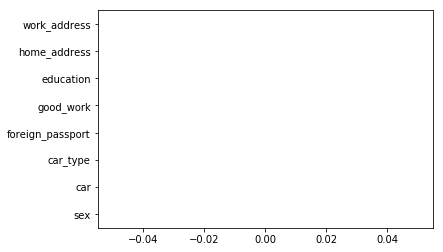

In [24]:
imp_cat = Series(mutual_info_classif(df_train[bin_cols + cat_cols], df_train['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [25]:
X_cat = OneHotEncoder(sparse = False).fit_transform(df_train[cat_cols].values)

In [26]:
X_cat.shape

(73799, 11)

In [27]:
X_num = StandardScaler().fit_transform(df_train[num_cols].values)
# Объединяем

X = np.hstack([X_num, df_train[bin_cols].values, X_cat])
Y = df_train['default'].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

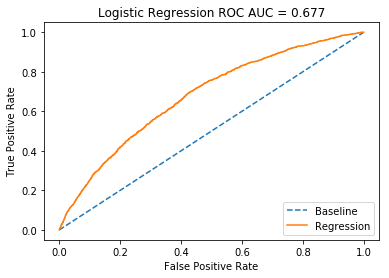

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

Лучшее Penalty: l1
Лучшее C: 1.0
